In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2
from tensorflow import keras
from keras import layers

## Functions

In [6]:
def df_to_X_y(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)


def load_data(file):
    df = pd.read_csv(file)
    df.drop(columns="Unnamed: 0", inplace= True)
    df = df.set_index("Date")
    return df

def fit_model(model, cp, epochs, xt, yt, xv, yv):
    model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
    model.fit(xt, yt, validation_data=(xv, yv), epochs=epochs, callbacks=[cp])
    return model

def plot_val(model,Nsample, xv, yv):
    val_predictions = model.predict(xv).flatten()
    val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':yv})
    plt.plot(val_results['Val Predictions'][:Nsample])
    plt.plot(val_results['Actuals'][:Nsample])
    plt.title("Validation")
    plt.show()
    
def plot_test(model, Nsample, xtt, ytt):
    test_predictions = model.predict(xtt).flatten()
    test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':ytt})
    plt.plot(test_results['Test Predictions'][:Nsample])
    plt.plot(test_results['Actuals'][:Nsample])
    plt.title("Test")
    plt.show()
    
def plot_predictions1(model, X, y, start=0, end=100):
    prediction = model.predict(X).flatten()
    df = pd.DataFrame(data={'Predictions':prediction, 'Actuals':y})
    plt.plot(df['Predictions'][start:end])
    plt.plot(df['Actuals'][start:end])
    plt.title("Predictions")
    plt.show()
    mse_v = mse(y, prediction)
    mae_v = mae(y, prediction)
    r2_v = r2(y, prediction)

    return mse_v, mae_v, r2_v


def plot_train(modelname, Nsample, xt, yt):
    model = load_model(modelname)
    train_predictions = model.predict(xt).flatten()
    train_results = pd.DataFrame(data={'Train Predictions': train_predictions, 'Actuals':yt})
    plt.plot(train_results['Train Predictions'][:Nsample])
    plt.plot(train_results['Actuals'][:Nsample])
    plt.title("Train")
    plt.show()
    
def load_data_model(epochs):
    x_train = np.load(f"epochs{epochs}/x_train.npy")
    y_train = np.load(f"epochs{epochs}/y_train.npy")
    x_test  = np.load(f"epochs{epochs}/x_test.npy")
    y_test  = np.load(f"epochs{epochs}/y_test.npy")
    x_val   = np.load(f"epochs{epochs}/x_val.npy")
    y_val   = np.load(f"epochs{epochs}/y_val.npy")
    
    return x_train, y_train, x_test, y_test, x_val, y_val

## Import Data

In [7]:
epochs = 50

In [8]:
x_train, y_train, x_test, y_test, x_val, y_val = load_data_model(epochs)

In [9]:
x_train[0]

array([[32.22],
       [32.3 ],
       [32.42],
       [32.54],
       [37.74],
       [33.22],
       [35.53]])

# General Model

### CNN

In [10]:
model = load_model(f"epochs{epochs}/cnn/")

2024-04-10 21:03:01.238667: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-04-10 21:03:01.241361: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-04-10 21:03:01.241443: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2024-04-10 21:03:01.241736: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


3/3 [==============================] - 0s 4ms/step


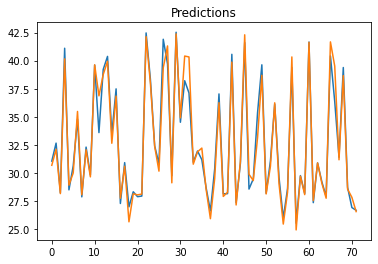

In [11]:
cnn_mse, cnn_mae, cnn_r2 = plot_predictions1(model, x_test, y_test)

### GRU

In [12]:
model = load_model(f"epochs{epochs}/gru/")

3/3 [==============================] - 0s 4ms/step


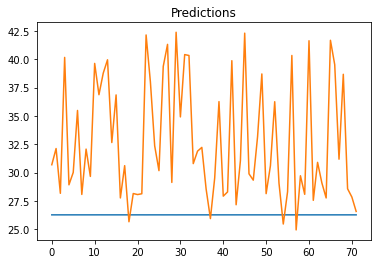

In [13]:
gru_mse, gru_mae, gru_r2 = plot_predictions1(model, x_test, y_test)

### LSTM

In [14]:
model = load_model(f"epochs{epochs}/lstm/")

3/3 [==============================] - 0s 3ms/step


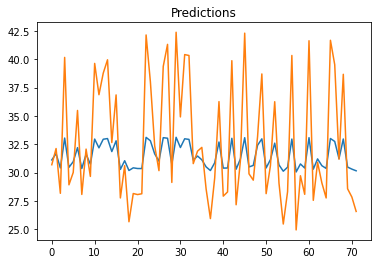

In [15]:
lstm_mse, lstm_mae, lstm_r2 = plot_predictions1(model, x_test, y_test)

### RNN

In [16]:
model = load_model(f"epochs{epochs}/rnn/")

3/3 [==============================] - 0s 4ms/step


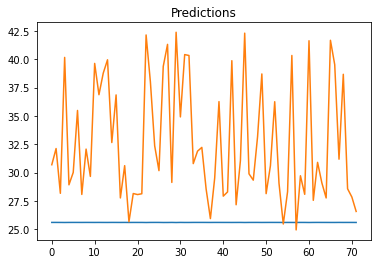

In [17]:
rnn_mse , rnn_mae, rnn_r2 = plot_predictions1(model, x_test, y_test)

# Moving Average

#### CNN

3/3 [==============================] - 0s 5ms/step


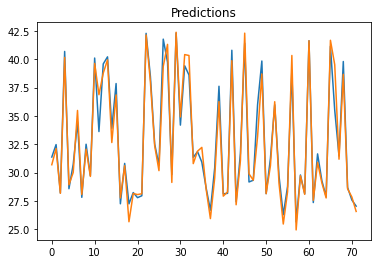

In [18]:
model = load_model(f"epochs{epochs}/mavg_cnn/")
mavg_cnn_mse , mavg_cnn_mae, mavg_cnn_r2 = plot_predictions1(model, x_test, y_test)

#### GRU

In [19]:
model = load_model(f"epochs{epochs}/mavg_gru/")

3/3 [==============================] - 0s 4ms/step


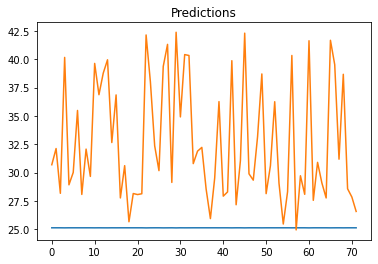

In [20]:
mavg_gru_mse , mavg_gru_mae, mavg_gru_r2 = plot_predictions1(model, x_test, y_test)

#### LSTM

In [21]:
model = load_model(f"epochs{epochs}/mavg_lstm/")

3/3 [==============================] - 0s 5ms/step


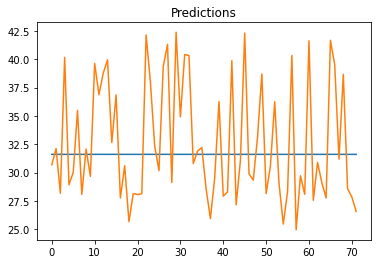

In [22]:
mavg_lstm_mse, mavg_lstm_mae, mavg_lstm_r2 = plot_predictions1(model, x_test, y_test)

#### RNN

In [23]:
model = load_model(f"epochs{epochs}/mavg_rnn/")

3/3 [==============================] - 0s 3ms/step


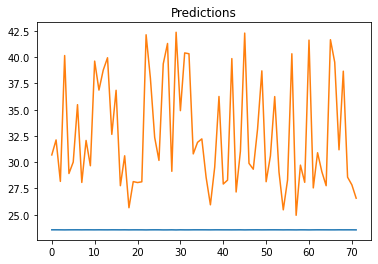

In [24]:
mavg_rnn_mse, mavg_rnn_mae, mavg_rnn_r2 = plot_predictions1(model, x_test, y_test)

# AutoEncoder

### CNN

In [25]:
model = load_model(f"epochs{epochs}/autoencoder_cnn/")

3/3 [==============================] - 0s 3ms/step


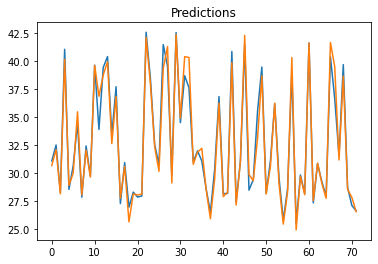

In [26]:
auto_cnn_mse, auto_cnn_mae, auto_cnn_r2 = plot_predictions1(model, x_test, y_test)

### GRU

In [27]:
model = load_model(f"epochs{epochs}/auto_gru/")

3/3 [==============================] - 0s 3ms/step


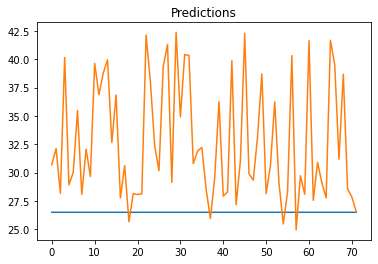

In [28]:
auto_gru_mse, auto_gru_mae, auto_gru_r2 = plot_predictions1(model, x_test, y_test)

### LSTM

In [29]:
model = load_model(f"epochs{epochs}/auto_lstm/")

3/3 [==============================] - 1s 4ms/step


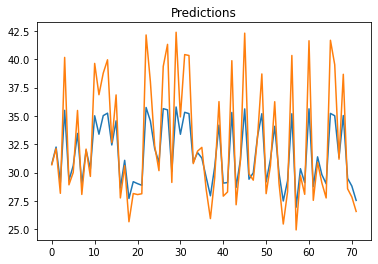

In [30]:
auto_lstm_mse, auto_lstm_mae, auto_lstm_r2 = plot_predictions1(model, x_test, y_test)

### RNN

In [31]:
model = load_model(f"epochs{epochs}/auto_rnn/")

3/3 [==============================] - 0s 3ms/step


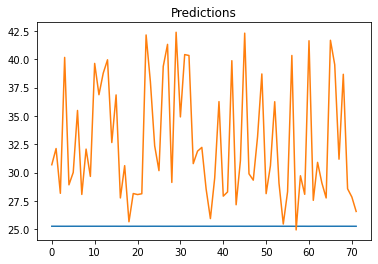

In [32]:
auto_rnn_mse, auto_rnn_mae, auto_rnn_r2 = plot_predictions1(model, x_test, y_test)

# Moving Average with Encoder

### CNN

In [33]:
model = load_model(f"epochs{epochs}/mavg_auto_cnn/")

3/3 [==============================] - 0s 3ms/step


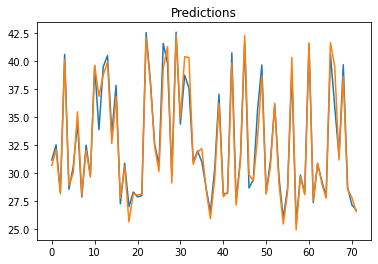

In [34]:
mavg_auto_cnn_mse, mavg_auto_cnn_mae, mavg_auto_cnn_r2 = plot_predictions1(model, x_test, y_test)

### RNN

In [35]:
model = load_model(f"epochs{epochs}/mavg_auto_rnn/")

3/3 [==============================] - 0s 2ms/step


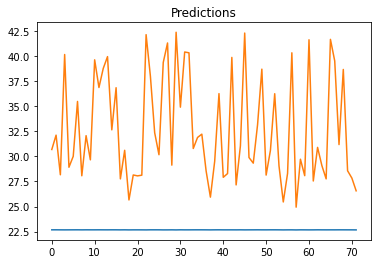

In [36]:
mavg_auto_rnn_mse, mavg_auto_rnn_mae, mavg_auto_rnn_r2 = plot_predictions1(model, x_test, y_test)

### GRU

In [37]:
model = load_model(f"epochs{epochs}/mavg_auto_gru/")

3/3 [==============================] - 0s 4ms/step


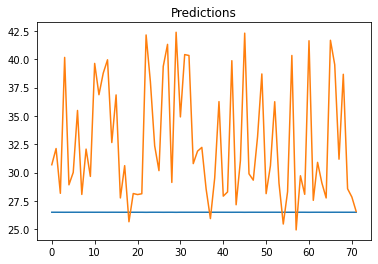

In [38]:
mavg_auto_gru_mse, mavg_auto_gru_mae, mavg_auto_gru_r2 = plot_predictions1(model, x_test, y_test)

### LSTM

In [39]:
model = load_model(f"epochs{epochs}/mavg_auto_lstm/")

3/3 [==============================] - 0s 4ms/step


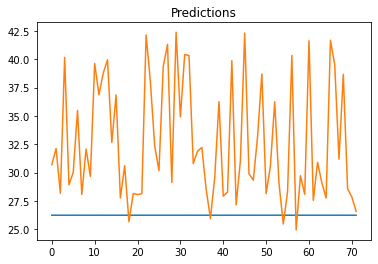

In [40]:
mavg_auto_lstm_mse, mavg_auto_lstm_mae, mavg_auto_lstm_r2 = plot_predictions1(model, x_test, y_test)

# Hybrid

## General

### CNN LSTM

In [41]:
model = load_model(f"epochs{epochs}/hybrid_cnn_lstm/")

3/3 [==============================] - 1s 5ms/step


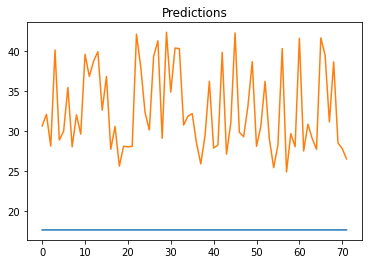

In [42]:
hybrid_cnn_lstm_mse, hybrid_cnn_lstm_mae, hybrid_cnn_lstm_r2 = plot_predictions1(model, x_test, y_test)

### RNN LSTM

In [43]:
model = load_model(f"epochs{epochs}/hybrid_rnn_lstm/")

3/3 [==============================] - 0s 4ms/step


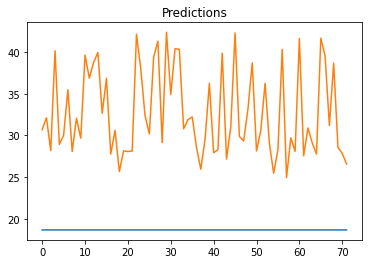

In [44]:
hybrid_rnn_lstm_mse, hybrid_rnn_lstm_mae, hybrid_rnn_lstm_r2 = plot_predictions1(model, x_test, y_test)

### RNN GRU

In [45]:
model = load_model(f"epochs{epochs}/hybrid_rnn_gru/")

3/3 [==============================] - 0s 4ms/step


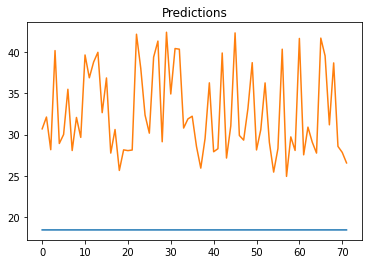

In [46]:
hybrid_rnn_gru_mse, hybrid_rnn_gru_mae, hybrid_rnn_gru_r2 = plot_predictions1(model, x_test, y_test)

### CNN GRU

In [47]:
model = load_model(f"epochs{epochs}/hybrid_cnn_gru/")

3/3 [==============================] - 1s 6ms/step


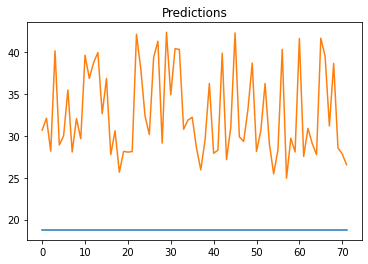

In [48]:
hybrid_cnn_gru_mse, hybrid_cnn_gru_mae, hybrid_cnn_gru_r2 = plot_predictions1(model, x_test, y_test)

### CNN RNN GRU

In [49]:
model = load_model(f"epochs{epochs}/hybrid_cnn_rnn_gru/")

3/3 [==============================] - 0s 5ms/step


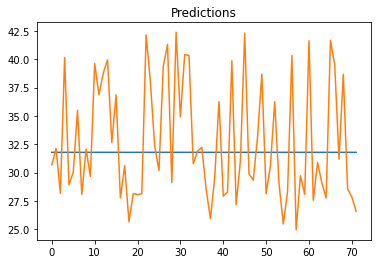

In [50]:
hybrid_cnn_rnn_gru_mse, hybrid_cnn_rnn_gru_mae, hybrid_cnn_rnn_gru_r2 = plot_predictions1(model, x_test, y_test)

### LSTM RNN GRU

In [51]:
model = load_model(f"epochs{epochs}/hybrid_lstm_rnn_gru/")

3/3 [==============================] - 1s 5ms/step


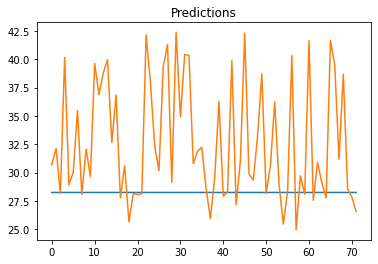

In [52]:
hybrid_lstm_rnn_gru_mse, hybrid_lstm_rnn_gru_mae, hybrid_lstm_rnn_gru_r2 = plot_predictions1(model, x_test, y_test)

## Moving Average

### CNN LSTM

In [53]:
model = load_model(f"epochs{epochs}/mavg_hybrid_cnn_lstm/")

3/3 [==============================] - 1s 5ms/step


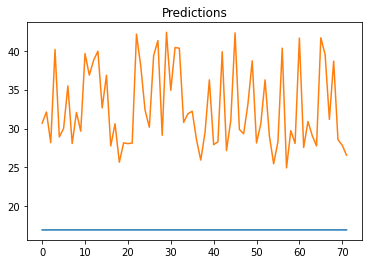

In [54]:
mavg_hybrid_cnn_lstm_mse, mavg_hybrid_cnn_lstm_mae, mavg_hybrid_cnn_lstm_r2 = plot_predictions1(model, x_test, y_test)

### RNN LSTM

In [55]:
model = load_model(f"epochs{epochs}/mavg_hybrid_rnn_lstm/")

3/3 [==============================] - 0s 4ms/step


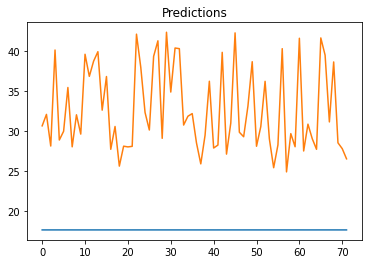

In [56]:
mavg_hybrid_rnn_lstm_mse, mavg_hybrid_rnn_lstm_mae, mavg_hybrid_rnn_lstm_r2 = plot_predictions1(model, x_test, y_test)

### RNN GRU

In [57]:
model = load_model(f"epochs{epochs}/mavg_hybrid_rnn_gru/")

3/3 [==============================] - 0s 4ms/step


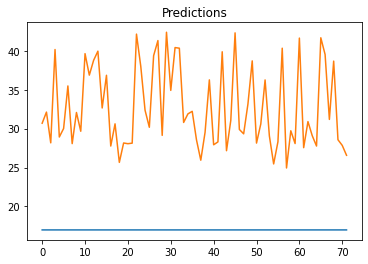

In [58]:
mavg_hybrid_rnn_gru_mse, mavg_hybrid_rnn_gru_mae, mavg_hybrid_rnn_gru_r2 = plot_predictions1(model, x_test, y_test)

### CNN GRU

In [59]:
model = load_model(f"epochs{epochs}/mavg_hybrid_cnn_gru/")

3/3 [==============================] - 1s 6ms/step


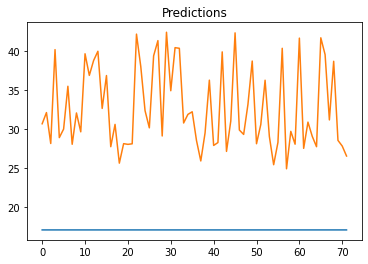

In [60]:
mavg_hybrid_cnn_gru_mse, mavg_hybrid_cnn_gru_mae, mavg_hybrid_cnn_gru_r2 = plot_predictions1(model, x_test, y_test)

### CNN RNN GRU

In [61]:
model = load_model(f"epochs{epochs}/mavg_hybrid_cnn_rnn_gru/")

3/3 [==============================] - 0s 6ms/step


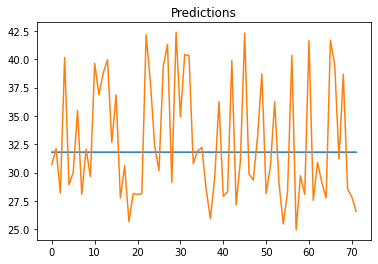

In [62]:
mavg_hybrid_cnn_rnn_gru_mse, mavg_hybrid_cnn_rnn_gru_mae, mavg_hybrid_cnn_rnn_gru_r2 = plot_predictions1(model, x_test, y_test)

### RNN LSTM GRU

In [63]:
model = load_model(f"epochs{epochs}/mavg_hybrid_lstm_rnn_gru/")

3/3 [==============================] - 1s 6ms/step


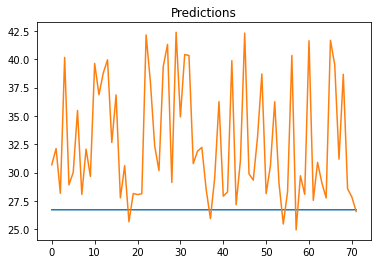

In [64]:
mavg_hybrid_lstm_rnn_gru_mse, mavg_hybrid_lstm_rnn_gru_mae, mavg_hybrid_lstm_rnn_gru_r2 = plot_predictions1(model, x_test, y_test)

# MSE

In [65]:
gen = ["General" for _ in range(0,4)]
ma = ["MA" for _ in range(0,4)]
ae = ["DReg" for _ in range(0,4)]
ma_ae = ["MA DReg" for _ in range(0,4)]
hy = ["HY" for _ in range(0,6)]
ma_hy = ["MA HY" for _ in range(0,6)]

model_cat = []
for a in gen:
    model_cat.append(a)
for a in ma:
    model_cat.append(a)
for a in ae:
    model_cat.append(a)
for a in ma_ae:
    model_cat.append(a)
for a in hy:
    model_cat.append(a)
for a in ma_hy:
    model_cat.append(a)

<AxesSubplot:xlabel='Model'>

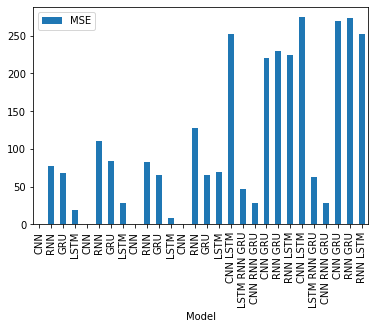

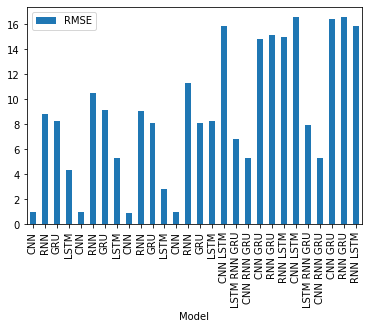

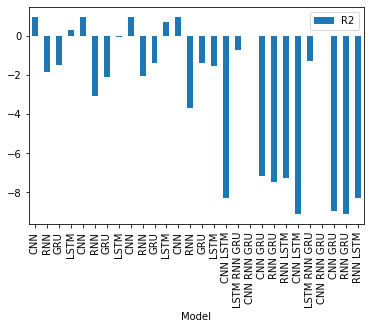

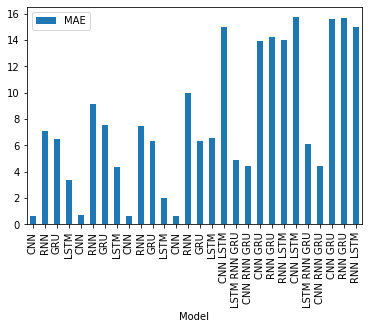

In [66]:
mse_list = [cnn_mse, rnn_mse, gru_mse, lstm_mse,
            mavg_cnn_mse, mavg_rnn_mse, mavg_gru_mse, mavg_lstm_mse,
            auto_cnn_mse, auto_rnn_mse, auto_gru_mse, auto_lstm_mse,
            mavg_auto_cnn_mse, mavg_auto_rnn_mse, mavg_auto_gru_mse, mavg_auto_lstm_mse,
            hybrid_cnn_lstm_mse, hybrid_lstm_rnn_gru_mse,hybrid_cnn_rnn_gru_mse,hybrid_cnn_gru_mse,
            hybrid_rnn_gru_mse,hybrid_rnn_lstm_mse,
            mavg_hybrid_cnn_lstm_mse, mavg_hybrid_lstm_rnn_gru_mse,mavg_hybrid_cnn_rnn_gru_mse,
            mavg_hybrid_cnn_gru_mse,mavg_hybrid_rnn_gru_mse,mavg_hybrid_rnn_lstm_mse]


mae_list = [cnn_mae, rnn_mae, gru_mae, lstm_mae,
            mavg_cnn_mae, mavg_rnn_mae, mavg_gru_mae, mavg_lstm_mae,
            auto_cnn_mae, auto_rnn_mae, auto_gru_mae, auto_lstm_mae,
            mavg_auto_cnn_mae, mavg_auto_rnn_mae, mavg_auto_gru_mae, mavg_auto_lstm_mae,
            hybrid_cnn_lstm_mae, hybrid_lstm_rnn_gru_mae,hybrid_cnn_rnn_gru_mae,hybrid_cnn_gru_mae,
            hybrid_rnn_gru_mae,hybrid_rnn_lstm_mae,
            mavg_hybrid_cnn_lstm_mae, mavg_hybrid_lstm_rnn_gru_mae,mavg_hybrid_cnn_rnn_gru_mae,
            mavg_hybrid_cnn_gru_mae,mavg_hybrid_rnn_gru_mae,mavg_hybrid_rnn_lstm_mae]

r2_list = [cnn_r2, rnn_r2, gru_r2, lstm_r2,
            mavg_cnn_r2, mavg_rnn_r2, mavg_gru_r2, mavg_lstm_r2,
            auto_cnn_r2, auto_rnn_r2, auto_gru_r2, auto_lstm_r2,
            mavg_auto_cnn_r2, mavg_auto_rnn_r2, mavg_auto_gru_r2, mavg_auto_lstm_r2,
            hybrid_cnn_lstm_r2, hybrid_lstm_rnn_gru_r2,hybrid_cnn_rnn_gru_r2,hybrid_cnn_gru_r2,
            hybrid_rnn_gru_r2,hybrid_rnn_lstm_r2,
            mavg_hybrid_cnn_lstm_r2, mavg_hybrid_lstm_rnn_gru_r2,mavg_hybrid_cnn_rnn_gru_r2,
            mavg_hybrid_cnn_gru_r2,mavg_hybrid_rnn_gru_r2,mavg_hybrid_rnn_lstm_r2]


model_n = ["CNN", "RNN", "GRU", "LSTM",
           "CNN", "RNN", "GRU", "LSTM",
           "CNN", "RNN", "GRU", "LSTM",
           "CNN", "RNN", "GRU", "LSTM",
           "CNN LSTM", "LSTM RNN GRU" ,"CNN RNN GRU","CNN GRU",
           "RNN GRU","RNN LSTM",
           "CNN LSTM", "LSTM RNN GRU","CNN RNN GRU",
           "CNN GRU","RNN GRU","RNN LSTM"
          ]


metricsdf = pd.DataFrame({
    "Model Category": model_cat,
    "Model": model_n,
    "MSE": mse_list,
    "MAE": mae_list,
    "R2": r2_list
})

rmse = np.sqrt(metricsdf.MSE)
metricsdf["RMSE"] = rmse

metricsdf.plot("Model", "MSE", kind= "bar")
metricsdf.plot("Model", "RMSE", kind= "bar")
metricsdf.plot("Model", "R2", kind= "bar")
metricsdf.plot("Model", "MAE", kind= "bar")

In [67]:
metricsdf

,Model Category,Model,MSE,MAE,R2,RMSE
0,General,CNN,0.958045,0.638687,0.964668,0.978798
1,General,RNN,77.390692,7.111883,-1.854113,8.797198
2,General,GRU,68.336554,6.505651,-1.520203,8.266593
3,General,LSTM,18.542487,3.371080,0.316166,4.306099
4,MA,CNN,1.019849,0.688267,0.962389,1.009876
5,MA,RNN,110.587358,9.135737,-3.078382,10.516052
6,MA,GRU,84.344744,7.569044,-2.110573,9.183939
7,MA,LSTM,28.280706,4.384030,-0.042972,5.317961
8,DReg,CNN,0.863780,0.635265,0.968144,0.929398
9,DReg,RNN,82.266232,7.435168,-2.033919,9.070073


In [68]:
metricsdf.to_csv(f"epochs{epochs}/metricsT.csv", index= False)

In [69]:
mse = metricsdf.MSE
mae = metricsdf.MAE
r2 = metricsdf.R2
rmse = metricsdf.RMSE

In [70]:
l_mse = ["MSE" for _ in range(0,28)]

msedf = pd.DataFrame({
    "Metrics": l_mse,
    "Model Category": metricsdf["Model Category"],
    "Model": metricsdf.Model,
    "y": mse
})


l_mae = ["MAE" for _ in range(0,28)]

maedf = pd.DataFrame({
    "Metrics": l_mae,
    "Model Category": metricsdf["Model Category"],
    "Model": metricsdf.Model,
    "y": mae
})


l_rmse = ["RMSE" for _ in range(0,28)]

rmsedf = pd.DataFrame({
    "Metrics": l_rmse,
    "Model Category": metricsdf["Model Category"],
    "Model": metricsdf.Model,
    "y": rmse
})


l_r2 = ["R2" for _ in range(0,28)]

r2df = pd.DataFrame({
    "Metrics": l_r2,
    "Model Category": metricsdf["Model Category"],
    "Model": metricsdf.Model,
    "y": r2
})

In [71]:
metrics = pd.concat([msedf, rmsedf, maedf, r2df])

In [72]:
metrics

,Metrics,Model Category,Model,y
0,MSE,General,CNN,0.958045
1,MSE,General,RNN,77.390692
2,MSE,General,GRU,68.336554
3,MSE,General,LSTM,18.542487
4,MSE,MA,CNN,1.019849
...,...,...,...,...
23,R2,MA HY,LSTM RNN GRU,-1.315216
24,R2,MA HY,CNN RNN GRU,-0.029142
25,R2,MA HY,CNN GRU,-8.926427
26,R2,MA HY,RNN GRU,-9.098673


In [73]:
metrics.to_csv(f"epochs{epochs}/metrics.csv", index= False)